### Data Preparation

Let's first import necessary packages and datasets and take a brief look at the data.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_rows', 100)

In [2]:
# import dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# look at data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### EDA

Let's first look at the distribution of SalePrice. Not surprisingly, it's right-skewed, and apply log() on it will make it closer to normal distribution.  

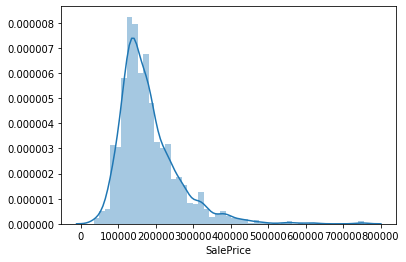

In [6]:
## look at the distribution of price
hist1 = sns.distplot(train.SalePrice)
hist1

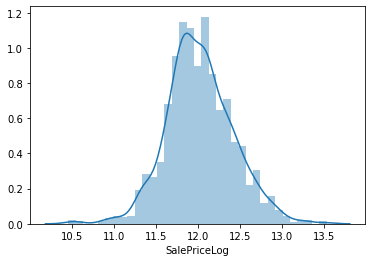

In [7]:
train['SalePriceLog'] = np.log(train.SalePrice)
sns.distplot(train.SalePriceLog)

Next, look at some **categorical variables** to see whether we see an obvious difference in SalePrice for each category.  

1. MSZoning identifies the general zoning classification of the sale.  
       A	Agriculture  
       C	Commercial  
       FV	Floating Village Residential  
       I	Industrial  
       RH	Residential High Density  
       RL	Residential Low Density  
       RP	Residential Low Density Park  
       RM	Residential Medium Density  

We do see that certain type of property tends to have a higher price (FV & RL), but please notice that there are much fewer properties with type other than RL and RM.

In [8]:
train.groupby('MSZoning')['SalePrice'].agg(['count','mean'])

,count,mean
MSZoning,,
C (all),10,74528.000000
FV,65,214014.061538
RH,16,131558.375000
RL,1151,191004.994787
RM,218,126316.830275


2. Street  
Street is the type of road access to property. 'Grvl' means Gravel and 'Pave' means Paved. However, there are only 6 properties with Gravel road access, so it does not tell much... 

In [9]:
train.groupby('Street')['SalePrice'].agg(['count','mean'])

,count,mean
Street,,
Grvl,6,130190.500000
Pave,1454,181130.538514


3. LotShape is the general shape of property.  
Reg: Regular, IR1: Slightly irregular, IR2: Moderately Irregular,  IR3: Irregular  
Again, there is a not very balanced category -- most properties have the shape L1 or R.  

In [10]:
train.groupby('LotShape')['SalePrice'].agg(['count','mean'])

,count,mean
LotShape,,
IR1,484,206101.665289
IR2,41,239833.365854
IR3,10,216036.500000
Reg,925,164754.818378


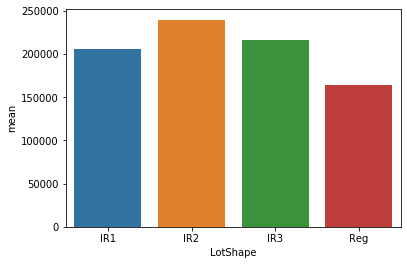

In [11]:
lotshape_summry = train.groupby('LotShape')['SalePrice'].agg(['count','mean']).reset_index()
sns.barplot(x = 'LotShape', y = 'mean', data = lotshape_summry)

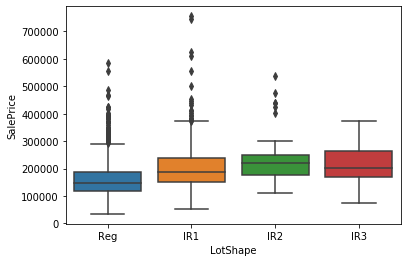

In [12]:
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = train)

4. Utilities represent the type of utilities available.  
This one is even unbalanced, with only one property of the type 'NoSeWa' (Electricity and Gas Only). We should consider dropping it for modeling. 

In [13]:
train.groupby('Utilities')['SalePrice'].agg(['count','mean'])

,count,mean
Utilities,,
AllPub,1459,180950.95682
NoSeWa,1,137500.00000


5. Neighborhood  
Neighborhood is typically pretty important for housing price. This dataset also tells the same story. 

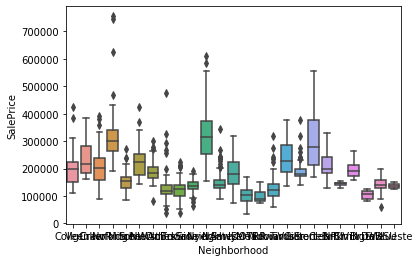

In [14]:
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = train)

6. Condition1 and Condition2  
These two columns provides proximity to various conditions, and again in most cases, the value is 'Norm'.  

In [15]:
train.groupby('Condition1')['SalePrice'].agg(['count','mean'])

,count,mean
Condition1,,
Artery,48,135091.666667
Feedr,81,142475.481481
Norm,1260,184495.492063
PosA,8,225875.000000
PosN,19,215184.210526
RRAe,11,138400.000000
RRAn,26,184396.615385
RRNe,2,190750.000000
RRNn,5,212400.000000


In [16]:
train.groupby('Condition2')['SalePrice'].agg(['count','mean'])

,count,mean
Condition2,,
Artery,2,106500.000000
Feedr,6,121166.666667
Norm,1445,181169.405536
PosA,1,325000.000000
PosN,2,284875.000000
RRAe,1,190000.000000
RRAn,1,136905.000000
RRNn,2,96750.000000


7. Building Type  
Looking at the building type, most properties are either 1Fam (Single-family Detached) or TwnhsE (Townhouse End Unit), and their average prices are higher than other types.  

In [17]:
train.groupby('BldgType')['SalePrice'].agg(['count','mean'])

,count,mean
BldgType,,
1Fam,1220,185763.807377
2fmCon,31,128432.258065
Duplex,52,133541.076923
Twnhs,43,135911.627907
TwnhsE,114,181959.342105


8. House Type  
HouseStype is the style of dwelling. Seems like properties with more finished stories tend to have higher prices.

In [18]:
train.groupby('HouseStyle')['SalePrice'].agg(['count','mean'])

,count,mean
HouseStyle,,
1.5Fin,154,143116.740260
1.5Unf,14,110150.000000
1Story,726,175985.477961
2.5Fin,8,220000.000000
2.5Unf,11,157354.545455
2Story,445,210051.764045
SFoyer,37,135074.486486
SLvl,65,166703.384615


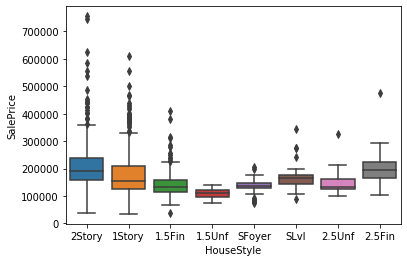

In [19]:
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = train)

Now let's switch to some **numeric variables**... 

1. GrLivArea  
GrLivArea is the Above grade (ground) living area square feet. It has a pretty strong positive correlation with sale price as everyone would assume...

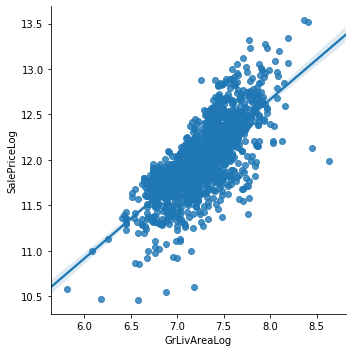

In [20]:
train['GrLivAreaLog'] = np.log(train['GrLivArea'])
sns.lmplot(x='GrLivAreaLog', y='SalePriceLog', data=train)

In [21]:
np.corrcoef(train['GrLivAreaLog'], train['SalePriceLog'])[0,1]

0.7302548511982291

2. LotArea  
Meanwhile, LotArea is the lot size. I was expecting it to be somewhat positively correlated with sale price as well, but seems like the correlation is pretty weak.  

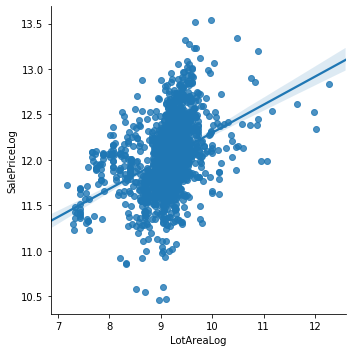

In [22]:
train['LotAreaLog'] = np.log(train['LotArea'])
sns.lmplot(x='LotAreaLog', y='SalePriceLog', data=train)

In [23]:
np.corrcoef(train['LotAreaLog'], train['SalePriceLog'])[0,1]

0.3999177411255905

3. LotFrontage  
Similar thing to LotFrontage, which is the linear feet of street connected to property.  

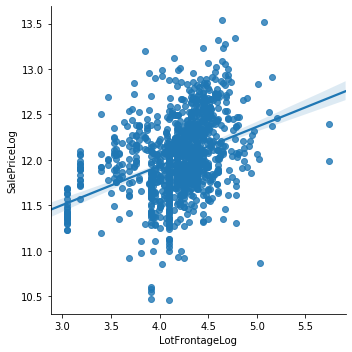

In [24]:
train['LotFrontageLog'] = np.log(train['LotFrontage'])
sns.lmplot(x='LotFrontageLog', y='SalePriceLog', data=train)

4. Building / Remodel / Sold Years  
Another thing I am interested in is -- is the average sale price increasing over year? Well the answer is no in this dataset (but maybe something due to the recession around 2009). But one thing about year that is always true is -- newer built properties tend to be sold at higher prices.  

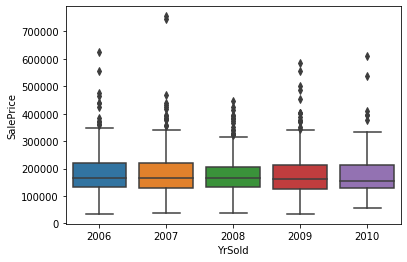

In [25]:
sns.boxplot(x = 'YrSold', y = 'SalePrice', data = train)

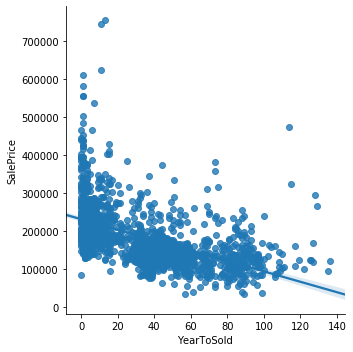

In [26]:
train['YearToSold'] = train['YrSold'] - train['YearBuilt']
sns.lmplot(x = 'YearToSold', y = 'SalePrice', data = train)

5. Overall Quality and Condition  
Last, let's look at two columns with subjective ratings: OverallQual (Rates the overall material and finish of the house) and OverallCond(Rates the overall condition of the house). OverallQual turned out to be have a "perfect" positive correlation with Sale Price... While OverallCond also follows a weaker but still positive correlation pattern.

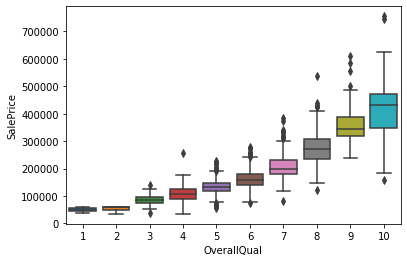

In [27]:
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = train)

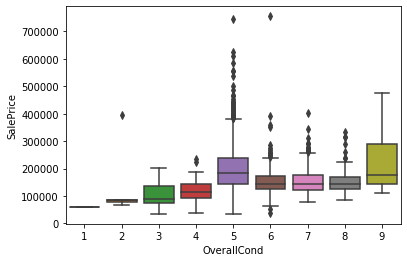

In [28]:
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = train)

### Data Preparation

By looking at the table description above and reading the column description doc, we know there are a lot of data type dismatch and NAs that we need to fix.

In [29]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## combine two datasets for easier column manipulation.
test['SalePrice'] = np.NaN
test['data_flg'] = 'test'
## print(test[['data_flg', 'SalesPrice']].head())

train['data_flg'] = 'train'

all_data = pd.concat([train, test])
all_data.data_flg.describe()

count      2919
unique        2
top       train
freq       1460
Name: data_flg, dtype: object

#### Data Cleaning

**Issue1**: MSSubClass should be strings though it's currently index with integers

In [30]:
all_data["MSSubClass"] = all_data["MSSubClass"].astype('object')
all_data["MSSubClass"].describe()

count     2919
unique      16
top         20
freq      1079
Name: MSSubClass, dtype: int64

**Issue2**: There are a lot of ordinal categorical variables.  
For simplicity and to keep the ordinal info, let's just convert them all into numeric variables following their level orders.  

In [31]:
cat_mapping = {'LotShape': {'Reg':1, 'IR1':2, 'IR3':3},
               'ExterQual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
               'ExterCond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
               'HeatingQC': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
               'KitchenQual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
               'BsmtQual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
               'BsmtCond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
               'FireplaceQu': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
               'GarageQual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
               'GarageCond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
               'PoolQC': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
               'BsmtExposure': {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
               'BsmtFinType1': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
               'BsmtFinType2': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
               'GarageFinish': {'NA':0, 'Unf':1, 'Rfn':2, 'Fin':3},
               'CentralAir': {'N':0, 'Y':1}
              }
all_data.replace(cat_mapping, inplace=True)
all_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,data_flg
0,1,60,RL,65.0,8450,Pave,NaN,1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,1,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,2,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,2,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,2,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train
5,6,50,RL,85.0,14115,Pave,NaN,2,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0,train
6,7,20,RL,75.0,10084,Pave,NaN,1,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0,train
7,8,60,RL,NaN,10382,Pave,NaN,2,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0,train
8,9,50,RM,51.0,6120,Pave,NaN,1,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0,train
9,10,190,RL,50.0,7420,Pave,NaN,1,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0,train


In [32]:
## check the current data types
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null object
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non

**Issue3**: Let's fill in NAs.  
In this case, NAs in most of the categorical variables means 'not applicable', so let's add it as a new category 'NA' (......). Similarly, for the NAs in the numeric variables, most of the cases it means 'no basement/garage/...' thus 'not applicable', so for simpicity let's just impute it with 0.   

In [33]:
## all columns with NaN
# all_data.columns[all_data.isna().sum()>0]

## all object columns with NaN
cat_col_with_na = all_data.columns[(all_data.isna().sum()>0) & (all_data.dtypes == 'object')].tolist()
num_col_with_na = all_data.columns[(all_data.isna().sum()>0) & ((all_data.dtypes == 'int64') | (all_data.dtypes == 'float64'))].tolist()

print(cat_col_with_na)
print(num_col_with_na)

['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtCond', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'Fence', 'MiscFeature', 'SaleType']
['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'SalePrice']


In [34]:
# fill in NAs in object columns with 'NA'
all_data[cat_col_with_na] = all_data[cat_col_with_na].fillna('NA')

# fill in NAs in numeric columns with 0
all_data[num_col_with_na] = all_data[num_col_with_na].fillna(0)

In [35]:
# is there any columns with NA anymore?
all_data.columns[all_data.isna().sum()>0]

Index([], dtype='object')

**Issue4**: there are a lot of categorical variables left that we need to pre-process and convert to numeric for xgboost model.  
There are two popular alternatives -- one-hot encoding and target encoding. Below I have code for both methods, but I will use target encoding with smoothing for modeling, as it keeps the info of each category better. Please notice that target encoding should be applied with the training set data only, so you will see the actual encoding in the modeling part.     

In [36]:
# One-hot Encoding
cat_columns = all_data.columns[(all_data.dtypes == 'object') | (all_data.dtypes == 'category')].tolist()
cat_columns.remove('data_flg')
all_data_one_hot = pd.get_dummies(all_data, columns=cat_columns)
all_data_one_hot.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_NA,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,4,3,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,3,3,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,4,3,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,3,3,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,4,3,...,0,0,0,1,0,0,0,0,1,0


In [37]:
all_data_one_hot.columns.tolist()

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'data_flg',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_150',
 'MSSubClass_16

In [38]:
data_types = dict(zip(all_data_one_hot.dtypes.index, all_data_one_hot.dtypes.values))
data_types

{'Id': dtype('int64'),
 'LotFrontage': dtype('float64'),
 'LotArea': dtype('int64'),
 'OverallQual': dtype('int64'),
 'OverallCond': dtype('int64'),
 'YearBuilt': dtype('int64'),
 'YearRemodAdd': dtype('int64'),
 'MasVnrArea': dtype('float64'),
 'ExterQual': dtype('int64'),
 'ExterCond': dtype('int64'),
 'BsmtQual': dtype('float64'),
 'BsmtExposure': dtype('float64'),
 'BsmtFinType1': dtype('float64'),
 'BsmtFinSF1': dtype('float64'),
 'BsmtFinType2': dtype('float64'),
 'BsmtFinSF2': dtype('float64'),
 'BsmtUnfSF': dtype('float64'),
 'TotalBsmtSF': dtype('float64'),
 'HeatingQC': dtype('int64'),
 'CentralAir': dtype('int64'),
 '1stFlrSF': dtype('int64'),
 '2ndFlrSF': dtype('int64'),
 'LowQualFinSF': dtype('int64'),
 'GrLivArea': dtype('int64'),
 'BsmtFullBath': dtype('float64'),
 'BsmtHalfBath': dtype('float64'),
 'FullBath': dtype('int64'),
 'HalfBath': dtype('int64'),
 'BedroomAbvGr': dtype('int64'),
 'KitchenAbvGr': dtype('int64'),
 'KitchenQual': dtype('float64'),
 'TotRmsAbvGrd': 

In [39]:
## target encoding (no smoothing applied here)
all_data_target_encoding = all_data.copy()
train = all_data[all_data.data_flg=='train']

for col in cat_columns:
    target_avg = pd.DataFrame(train.groupby(col)['SalePrice'].mean()).reset_index()
    target_avg.columns = [col, col+'_avg']
    #target_avg

    all_data_target_encoding = pd.merge(all_data_target_encoding, target_avg, on = col, how = 'left')
    all_data_target_encoding.drop(col, axis = 1)

In [40]:
# check the data types again
data_types = dict(zip(all_data_target_encoding.dtypes.index, all_data_one_hot.dtypes.values))
data_types

{'Id': dtype('int64'),
 'MSSubClass': dtype('float64'),
 'MSZoning': dtype('int64'),
 'LotFrontage': dtype('int64'),
 'LotArea': dtype('int64'),
 'Street': dtype('int64'),
 'Alley': dtype('int64'),
 'LotShape': dtype('float64'),
 'LandContour': dtype('int64'),
 'Utilities': dtype('int64'),
 'LotConfig': dtype('float64'),
 'LandSlope': dtype('float64'),
 'Neighborhood': dtype('float64'),
 'Condition1': dtype('float64'),
 'Condition2': dtype('float64'),
 'BldgType': dtype('float64'),
 'HouseStyle': dtype('float64'),
 'OverallQual': dtype('float64'),
 'OverallCond': dtype('int64'),
 'YearBuilt': dtype('int64'),
 'YearRemodAdd': dtype('int64'),
 'RoofStyle': dtype('int64'),
 'RoofMatl': dtype('int64'),
 'Exterior1st': dtype('int64'),
 'Exterior2nd': dtype('float64'),
 'MasVnrType': dtype('float64'),
 'MasVnrArea': dtype('int64'),
 'ExterQual': dtype('int64'),
 'ExterCond': dtype('int64'),
 'Foundation': dtype('int64'),
 'BsmtQual': dtype('float64'),
 'BsmtCond': dtype('int64'),
 'BsmtExpos

In [41]:
## target encoding with smooting: https://maxhalford.github.io/blog/target-encoding-done-the-right-way/

def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [42]:
all_data_target_encoding = all_data.copy()
train = all_data[all_data.data_flg=='train']

for col in cat_columns:
    all_data_target_encoding[col] = calc_smooth_mean(train, col, 'SalePrice', 10)

In [43]:
data_types = dict(zip(all_data_target_encoding.dtypes.index, all_data_one_hot.dtypes.values))
data_types

{'Id': dtype('int64'),
 'MSSubClass': dtype('float64'),
 'MSZoning': dtype('int64'),
 'LotFrontage': dtype('int64'),
 'LotArea': dtype('int64'),
 'Street': dtype('int64'),
 'Alley': dtype('int64'),
 'LotShape': dtype('float64'),
 'LandContour': dtype('int64'),
 'Utilities': dtype('int64'),
 'LotConfig': dtype('float64'),
 'LandSlope': dtype('float64'),
 'Neighborhood': dtype('float64'),
 'Condition1': dtype('float64'),
 'Condition2': dtype('float64'),
 'BldgType': dtype('float64'),
 'HouseStyle': dtype('float64'),
 'OverallQual': dtype('float64'),
 'OverallCond': dtype('int64'),
 'YearBuilt': dtype('int64'),
 'YearRemodAdd': dtype('int64'),
 'RoofStyle': dtype('int64'),
 'RoofMatl': dtype('int64'),
 'Exterior1st': dtype('int64'),
 'Exterior2nd': dtype('float64'),
 'MasVnrType': dtype('float64'),
 'MasVnrArea': dtype('int64'),
 'ExterQual': dtype('int64'),
 'ExterCond': dtype('int64'),
 'Foundation': dtype('int64'),
 'BsmtQual': dtype('float64'),
 'BsmtCond': dtype('int64'),
 'BsmtExpos

In [44]:
all_data_target_encoding.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,data_flg
0,1,238038.232877,190918.140361,65.0,8450,181129.108578,183433.77807,164927.720812,180189.329265,180950.754227,...,0.0,187540.692985,182038.463954,0,2,2008,173460.719623,175249.562052,208500.0,train
1,2,185145.990767,190918.140361,80.0,9600,181129.108578,183433.77807,164927.720812,180189.329265,180950.754227,...,0.0,187540.692985,182038.463954,0,5,2007,173460.719623,175249.562052,181500.0,train
2,3,238038.232877,190918.140361,68.0,11250,181129.108578,183433.77807,205591.939188,180189.329265,180950.754227,...,0.0,187540.692985,182038.463954,0,9,2008,173460.719623,175249.562052,223500.0,train
3,4,168793.670841,190918.140361,60.0,9550,181129.108578,183433.77807,205591.939188,180189.329265,180950.754227,...,0.0,187540.692985,182038.463954,0,2,2006,173460.719623,149625.233864,140000.0,train
4,5,238038.232877,190918.140361,84.0,14260,181129.108578,183433.77807,205591.939188,180189.329265,180950.754227,...,0.0,187540.692985,182038.463954,0,12,2008,173460.719623,175249.562052,250000.0,train
5,6,145745.714019,190918.140361,85.0,14115,181129.108578,183433.77807,205591.939188,180189.329265,180950.754227,...,0.0,150677.442868,156227.202693,700,10,2009,173460.719623,175249.562052,143000.0,train
6,7,185145.990767,190918.140361,75.0,10084,181129.108578,183433.77807,164927.720812,180189.329265,180950.754227,...,0.0,187540.692985,182038.463954,0,8,2007,173460.719623,175249.562052,307000.0,train
7,8,238038.232877,190918.140361,0.0,10382,181129.108578,183433.77807,205591.939188,180189.329265,180950.754227,...,0.0,187540.692985,156227.202693,350,11,2009,173460.719623,175249.562052,200000.0,train
8,9,145745.714019,128711.758592,51.0,6120,181129.108578,183433.77807,164927.720812,180189.329265,180950.754227,...,0.0,187540.692985,182038.463954,0,4,2008,173460.719623,149625.233864,129900.0,train
9,10,142440.298973,190918.140361,50.0,7420,181129.108578,183433.77807,164927.720812,180189.329265,180950.754227,...,0.0,187540.692985,182038.463954,0,1,2008,173460.719623,175249.562052,118000.0,train


#### New Features

Here we are not doing comprehensive feature engineering (ideally you should keep doing it and validating with your model, and it is the key to better model performance), but let's just create some new features with common sense...

In [45]:
## year-based features
all_data['RemodFlag'] = (all_data['YearBuilt'] == all_data['YearRemodAdd']) * 1.0
all_data['YearSinceRemod'] = all_data['YrSold'] - all_data['YearRemodAdd']
all_data['YearToSold'] = all_data['YrSold'] - all_data['YearBuilt']

# area comparison
all_data['MasVnrToLiv'] = all_data['MasVnrArea'] / all_data['GrLivArea']
all_data['BsmtToLiv'] = all_data['TotalBsmtSF'] / all_data['GrLivArea']
all_data['WoodDeckToLiv'] = all_data['WoodDeckSF'] / all_data['GrLivArea']
all_data['OpenPorchToLiv'] = all_data['OpenPorchSF'] / all_data['GrLivArea']
all_data['EnclosedPorchToLiv'] = all_data['EnclosedPorch'] / all_data['GrLivArea']
all_data['3SsnPorchToLiv'] = all_data['3SsnPorch'] / all_data['GrLivArea']
all_data['ScreenPorchToLiv'] = all_data['ScreenPorch'] / all_data['GrLivArea']
all_data['PoolToLiv'] = all_data['PoolArea'] / all_data['GrLivArea']
all_data['GarageToLiv'] = all_data['GarageArea'] / all_data['GrLivArea']

In [46]:
all_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YearToSold,MasVnrToLiv,BsmtToLiv,WoodDeckToLiv,OpenPorchToLiv,EnclosedPorchToLiv,3SsnPorchToLiv,ScreenPorchToLiv,PoolToLiv,GarageToLiv
0,1,60,RL,65.0,8450,Pave,NA,1,Lvl,AllPub,...,5,0.114620,0.500585,0.000000,0.035673,0.000000,0.000000,0.0,0.0,0.320468
1,2,20,RL,80.0,9600,Pave,NA,1,Lvl,AllPub,...,31,0.000000,1.000000,0.236133,0.000000,0.000000,0.000000,0.0,0.0,0.364501
2,3,60,RL,68.0,11250,Pave,NA,2,Lvl,AllPub,...,7,0.090705,0.515118,0.000000,0.023516,0.000000,0.000000,0.0,0.0,0.340426
3,4,70,RL,60.0,9550,Pave,NA,2,Lvl,AllPub,...,91,0.000000,0.440303,0.000000,0.020384,0.158416,0.000000,0.0,0.0,0.373908
4,5,60,RL,84.0,14260,Pave,NA,2,Lvl,AllPub,...,8,0.159236,0.520928,0.087352,0.038217,0.000000,0.000000,0.0,0.0,0.380346
5,6,50,RL,85.0,14115,Pave,NA,2,Lvl,AllPub,...,16,0.000000,0.584435,0.029369,0.022026,0.000000,0.234949,0.0,0.0,0.352423
6,7,20,RL,75.0,10084,Pave,NA,1,Lvl,AllPub,...,3,0.109799,0.995277,0.150531,0.033648,0.000000,0.000000,0.0,0.0,0.375443
7,8,60,RL,0.0,10382,Pave,NA,2,Lvl,AllPub,...,36,0.114833,0.529665,0.112440,0.097608,0.109091,0.000000,0.0,0.0,0.231579
8,9,50,RM,51.0,6120,Pave,NA,1,Lvl,AllPub,...,77,0.000000,0.536640,0.050733,0.000000,0.115558,0.000000,0.0,0.0,0.263811
9,10,190,RL,50.0,7420,Pave,NA,1,Lvl,AllPub,...,69,0.000000,0.920149,0.000000,0.003714,0.000000,0.000000,0.0,0.0,0.190344


### Modeling

Now that we have prepared the data, let's build a simple regressor with xgboost package. Here I am simply using a 80/20 split of the training set to do model validation. (Ideally you should do a k-fold cross-validation)

In [47]:
import xgboost as xgb

In [48]:
# seperate training and testing set from the processed all_data table
all_train = all_data[all_data.data_flg=='train'].drop('data_flg', axis=1).copy()
all_test = all_data[all_data.data_flg=='test'].drop('data_flg', axis=1).copy()

In [49]:
# targeting encoding function with smoothing parameter(m)
def calc_smooth_mean(df_train, df_test, by, on, m):
    # Compute the global mean
    mean = df_train[on].mean()

    # Compute the number of values and the mean of each group
    agg = df_train.groupby(by)[on].agg(['count', 'mean']).reset_index()

    # Compute the "smoothed" means
    agg[by+'_avg'] = (agg['count'] * agg['mean'] + m * mean) / (agg['count'] + m)
    agg = agg.drop(['count','mean'],axis=1)

    return agg

In [50]:
# id column is meaningless, let's remove it to avoid noise
all_train = all_train.drop('Id', axis=1)

# 80/20 split of training set
from sklearn.model_selection import train_test_split
train, test = train_test_split(all_train, test_size=0.2)

# apply target encoding to all non-numeric columns
cat_columns = train.columns[(train.dtypes == 'object') | (train.dtypes == 'category')].tolist()
for col in cat_columns:
    agg = calc_smooth_mean(train, test, col, 'SalePrice', 10)
    #print(agg)
    train = pd.merge(train, agg, on = col, how = 'left')
    test = pd.merge(test, agg, on = col, how = 'left')
    train = train.drop(col, axis=1)
    test = test.drop(col, axis=1)
    

In [51]:
train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Heating_avg,Electrical_avg,Functional_avg,GarageType_avg,GarageFinish_avg,PavedDrive_avg,Fence_avg,MiscFeature_avg,SaleType_avg,SaleCondition_avg
0,67.0,12354,6,8,1920,2000,0.0,3,3,3.0,...,182900.783341,187755.224252,183948.829884,135678.385961,144173.025086,187352.475178,179592.071047,156718.643836,187216.585127,175734.895536
1,41.0,2665,5,6,1977,1977,0.0,3,3,3.0,...,182900.783341,187755.224252,183948.829884,203292.807854,202302.801681,187352.475178,188855.654366,183134.626824,173874.507563,175734.895536
2,60.0,10440,6,7,1920,1950,0.0,4,4,4.0,...,178019.216324,187755.224252,189454.109589,135678.385961,144173.025086,187352.475178,148938.214109,156718.643836,173874.507563,175734.895536
3,111.0,16259,9,5,2006,2006,370.0,3,3,5.0,...,182900.783341,187755.224252,183948.829884,203292.807854,202302.801681,187352.475178,188855.654366,183134.626824,268804.492910,266126.839246
4,50.0,8635,5,5,1948,2001,0.0,3,3,3.0,...,182900.783341,187755.224252,155795.064464,135678.385961,144173.025086,187352.475178,148938.214109,183134.626824,173874.507563,175734.895536


In [52]:
test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Heating_avg,Electrical_avg,Functional_avg,GarageType_avg,GarageFinish_avg,PavedDrive_avg,Fence_avg,MiscFeature_avg,SaleType_avg,SaleCondition_avg
0,60.0,6000,4,4,1953,1953,0.0,2,3,2.0,...,182900.783341,187755.224252,156698.005641,135678.385961,144173.025086,187352.475178,188855.654366,183134.626824,173874.507563,175734.895536
1,65.0,8773,7,5,2004,2004,98.0,4,3,4.0,...,182900.783341,187755.224252,183948.829884,203292.807854,202302.801681,187352.475178,188855.654366,183134.626824,173874.507563,175734.895536
2,69.0,9142,6,8,1910,1950,0.0,3,2,2.0,...,182900.783341,164506.849315,183948.829884,135678.385961,144173.025086,187352.475178,188855.654366,183134.626824,173874.507563,175734.895536
3,65.0,7800,5,7,1967,2004,89.0,3,3,3.0,...,182900.783341,187755.224252,183948.829884,203292.807854,238742.852893,187352.475178,148938.214109,183134.626824,173874.507563,175734.895536
4,94.0,7819,6,5,1976,1976,0.0,3,3,3.0,...,182900.783341,187755.224252,183948.829884,135678.385961,144173.025086,187352.475178,148938.214109,183134.626824,173874.507563,146879.763543


In [53]:
# train with log(SalesPrice) as it is less skewed
train['SalePriceLog'] = np.log(train['SalePrice'])
test['SalePriceLog'] = np.log(test['SalePrice'])

train = train.drop('SalePrice', axis = 1)
test = test.drop('SalePrice', axis = 1)

train_label = train['SalePriceLog']
train = train.drop('SalePriceLog', axis=1)

test_label = test['SalePriceLog']
test = test.drop('SalePriceLog', axis=1)

dtrain = xgb.DMatrix(train, label=train_label)
dtest = xgb.DMatrix(test, label=test_label)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [54]:
train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Heating_avg,Electrical_avg,Functional_avg,GarageType_avg,GarageFinish_avg,PavedDrive_avg,Fence_avg,MiscFeature_avg,SaleType_avg,SaleCondition_avg
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,57.736301,10423.011986,6.121575,5.578767,1971.553082,1985.053082,107.220890,3.399829,3.095890,3.482877,...,182595.418911,182923.622364,182628.272397,182429.745634,182152.978084,182625.560489,182673.445621,182201.747251,181715.070596,181904.889869
std,34.747230,8799.854953,1.386907,1.110345,30.344730,20.726495,187.266997,0.582728,0.352808,0.882884,...,2823.594689,16106.890374,5878.588626,36982.662033,41886.562071,15957.840233,14071.940477,4849.366980,27472.858164,27729.714186
min,0.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.000000,2.000000,0.000000,...,144632.146119,128800.270631,155791.585127,113826.356858,113826.356858,124475.797491,147027.645128,156718.643836,154902.812591,146879.763543
25%,43.000000,7622.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.000000,3.000000,3.000000,...,182900.783341,187755.224252,183948.829884,135678.385961,144173.025086,187352.475178,188855.654366,183134.626824,173874.507563,175734.895536
50%,63.000000,9501.500000,6.000000,5.000000,1974.000000,1994.000000,0.000000,3.000000,3.000000,4.000000,...,182900.783341,187755.224252,183948.829884,203292.807854,202302.801681,187352.475178,188855.654366,183134.626824,173874.507563,175734.895536
75%,78.000000,11621.750000,7.000000,6.000000,2001.000000,2004.000000,170.000000,4.000000,3.000000,4.000000,...,182900.783341,187755.224252,183948.829884,203292.807854,202302.801681,187352.475178,188855.654366,183134.626824,173874.507563,175734.895536
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.000000,5.000000,5.000000,...,182900.783341,187755.224252,189454.109589,247424.314897,238742.852893,187352.475178,188855.654366,188098.381071,268804.492910,266126.839246


In [55]:
param = {'max_depth': 5, 'eta': 0.1, 'objective': 'reg:squarederror', 'seed': 42}
param['eval_metric'] = 'rmse'
evallist = [(dtest, 'eval'), (dtrain, 'train')]

num_round = 1000
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=20)

[0]	eval-rmse:10.3557	train-rmse:10.3857
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 20 rounds.
[1]	eval-rmse:9.31968	train-rmse:9.34964
[2]	eval-rmse:8.38732	train-rmse:8.41727
[3]	eval-rmse:7.54946	train-rmse:7.57808
[4]	eval-rmse:6.79535	train-rmse:6.82279
[5]	eval-rmse:6.1167	train-rmse:6.14296
[6]	eval-rmse:5.50731	train-rmse:5.5311
[7]	eval-rmse:4.95765	train-rmse:4.98043
[8]	eval-rmse:4.46298	train-rmse:4.48484
[9]	eval-rmse:4.01821	train-rmse:4.03883
[10]	eval-rmse:3.61737	train-rmse:3.63744
[11]	eval-rmse:3.25649	train-rmse:3.27618
[12]	eval-rmse:2.93273	train-rmse:2.95108
[13]	eval-rmse:2.64011	train-rmse:2.65849
[14]	eval-rmse:2.37767	train-rmse:2.39506
[15]	eval-rmse:2.14206	train-rmse:2.15798
[16]	eval-rmse:1.92966	train-rmse:1.94465
[17]	eval-rmse:1.73815	train-rmse:1.75267
[18]	eval-rmse:1.56754	train-rmse:1.5798
[19]	eval-rmse:1.41177	train-rmse:1.42427
[20]	eval-rmse:1.27221	train

[184]	eval-rmse:0.134233	train-rmse:0.032258
[185]	eval-rmse:0.13422	train-rmse:0.032167
[186]	eval-rmse:0.134202	train-rmse:0.032074
[187]	eval-rmse:0.134192	train-rmse:0.03202
[188]	eval-rmse:0.134135	train-rmse:0.031909
[189]	eval-rmse:0.1341	train-rmse:0.031775
[190]	eval-rmse:0.134073	train-rmse:0.031653
[191]	eval-rmse:0.133994	train-rmse:0.031492
[192]	eval-rmse:0.134	train-rmse:0.031383
[193]	eval-rmse:0.133989	train-rmse:0.031329
[194]	eval-rmse:0.133967	train-rmse:0.031153
[195]	eval-rmse:0.133977	train-rmse:0.031075
[196]	eval-rmse:0.133967	train-rmse:0.030967
[197]	eval-rmse:0.133949	train-rmse:0.030859
[198]	eval-rmse:0.133923	train-rmse:0.030779
[199]	eval-rmse:0.133897	train-rmse:0.030521
[200]	eval-rmse:0.133935	train-rmse:0.030373
[201]	eval-rmse:0.133937	train-rmse:0.030247
[202]	eval-rmse:0.13398	train-rmse:0.030072
[203]	eval-rmse:0.133964	train-rmse:0.030023
[204]	eval-rmse:0.133967	train-rmse:0.029983
[205]	eval-rmse:0.134004	train-rmse:0.029855
[206]	eval-rmse:0.

[367]	eval-rmse:0.133924	train-rmse:0.013436
[368]	eval-rmse:0.133931	train-rmse:0.013409
[369]	eval-rmse:0.133936	train-rmse:0.013353
[370]	eval-rmse:0.133916	train-rmse:0.013301
[371]	eval-rmse:0.133915	train-rmse:0.013231
[372]	eval-rmse:0.133925	train-rmse:0.013154
[373]	eval-rmse:0.133931	train-rmse:0.013106
[374]	eval-rmse:0.133935	train-rmse:0.013036
[375]	eval-rmse:0.133941	train-rmse:0.013007
[376]	eval-rmse:0.133915	train-rmse:0.012949
[377]	eval-rmse:0.133928	train-rmse:0.012869
[378]	eval-rmse:0.133908	train-rmse:0.012805
[379]	eval-rmse:0.133901	train-rmse:0.01278
[380]	eval-rmse:0.133904	train-rmse:0.012774
[381]	eval-rmse:0.1339	train-rmse:0.01275
[382]	eval-rmse:0.133901	train-rmse:0.012663
[383]	eval-rmse:0.133884	train-rmse:0.012608
[384]	eval-rmse:0.133909	train-rmse:0.012556
[385]	eval-rmse:0.133877	train-rmse:0.012437
[386]	eval-rmse:0.1339	train-rmse:0.012355
[387]	eval-rmse:0.133932	train-rmse:0.012275
[388]	eval-rmse:0.133946	train-rmse:0.012252
[389]	eval-rmse:

[551]	eval-rmse:0.133669	train-rmse:0.006146
[552]	eval-rmse:0.13367	train-rmse:0.00612
[553]	eval-rmse:0.133668	train-rmse:0.006112
[554]	eval-rmse:0.133663	train-rmse:0.006092
[555]	eval-rmse:0.133656	train-rmse:0.006061
[556]	eval-rmse:0.133658	train-rmse:0.006055
[557]	eval-rmse:0.133659	train-rmse:0.006015
[558]	eval-rmse:0.133663	train-rmse:0.005978
[559]	eval-rmse:0.133667	train-rmse:0.005957
[560]	eval-rmse:0.133669	train-rmse:0.005943
[561]	eval-rmse:0.133665	train-rmse:0.005931
[562]	eval-rmse:0.133657	train-rmse:0.005909
[563]	eval-rmse:0.133661	train-rmse:0.005897
[564]	eval-rmse:0.133667	train-rmse:0.005887
[565]	eval-rmse:0.133678	train-rmse:0.005845
[566]	eval-rmse:0.133688	train-rmse:0.005816
[567]	eval-rmse:0.133703	train-rmse:0.005773
[568]	eval-rmse:0.133707	train-rmse:0.005758
[569]	eval-rmse:0.133704	train-rmse:0.005733
[570]	eval-rmse:0.133701	train-rmse:0.005714
[571]	eval-rmse:0.133706	train-rmse:0.005703
[572]	eval-rmse:0.133692	train-rmse:0.005681
[573]	eval-r

[734]	eval-rmse:0.133672	train-rmse:0.002696
[735]	eval-rmse:0.133678	train-rmse:0.002673
[736]	eval-rmse:0.13368	train-rmse:0.00267
[737]	eval-rmse:0.133672	train-rmse:0.002656
[738]	eval-rmse:0.133672	train-rmse:0.002654
[739]	eval-rmse:0.133672	train-rmse:0.00265
[740]	eval-rmse:0.133673	train-rmse:0.002637
[741]	eval-rmse:0.133673	train-rmse:0.002625
[742]	eval-rmse:0.133671	train-rmse:0.002614
[743]	eval-rmse:0.13367	train-rmse:0.0026
[744]	eval-rmse:0.133668	train-rmse:0.002596
[745]	eval-rmse:0.133666	train-rmse:0.002587
[746]	eval-rmse:0.133665	train-rmse:0.002568
[747]	eval-rmse:0.133664	train-rmse:0.002553
[748]	eval-rmse:0.133662	train-rmse:0.002536
[749]	eval-rmse:0.133663	train-rmse:0.002522
[750]	eval-rmse:0.133664	train-rmse:0.002511
[751]	eval-rmse:0.133662	train-rmse:0.002501
[752]	eval-rmse:0.133664	train-rmse:0.002483
[753]	eval-rmse:0.133668	train-rmse:0.002469
[754]	eval-rmse:0.133667	train-rmse:0.002446
[755]	eval-rmse:0.133665	train-rmse:0.002444
[756]	eval-rmse:

In [56]:
importance = bst.get_score(importance_type='gain')
pd.DataFrame({"feature": list(importance.keys()), 
              "gain": list(importance.values())}).sort_values(by = "gain", ascending = False)

,feature,gain
10,CentralAir,0.512949
4,GarageType_avg,0.311594
31,GarageCond,0.203327
0,OverallQual,0.195872
1,Neighborhood_avg,0.191623
11,KitchenQual,0.180731
9,FireplaceQu,0.143880
2,GrLivArea,0.141008
34,KitchenAbvGr,0.072442
3,TotalBsmtSF,0.060188


In [57]:
## prediction

all_train = all_data[all_data.data_flg=='train'].drop('data_flg', axis=1).copy()
all_test = all_data[all_data.data_flg=='test'].drop('data_flg', axis=1).copy()


all_train = all_train.drop('Id', axis=1)

all_test_id = all_test['Id']
all_test = all_test.drop('Id', axis=1)
all_test = all_test.drop('SalePrice', axis=1)

for col in cat_columns:
    agg = calc_smooth_mean(all_train, all_test, col, 'SalePrice', 10)
    all_train = pd.merge(all_train, agg, on = col, how = 'left')
    all_test = pd.merge(all_test, agg, on = col, how = 'left')
    all_train = all_train.drop(col, axis=1)
    all_test = all_test.drop(col, axis=1)

all_train['SalePriceLog'] = np.log(all_train['SalePrice'])
train_label = all_train['SalePriceLog']
all_train = all_train.drop('SalePriceLog', axis=1)
all_train = all_train.drop('SalePrice', axis=1)

dtrain = xgb.DMatrix(all_train, label=train_label)
dtest = xgb.DMatrix(all_test)

param = {'max_depth': 5, 'eta': 0.1, 'objective': 'reg:squarederror'}
param['eval_metric'] = 'rmse'

num_round = 800
bst = xgb.train(param, dtrain, num_round)

ypred = bst.predict(dtest)
print(ypred)

[11.776821 12.003683 12.178734 ... 11.927103 11.617664 12.206117]


In [58]:
submission = pd.DataFrame({'Id' : all_test_id,
                           'SalePriceLog' : ypred})

submission['SalePrice'] = np.exp(submission['SalePriceLog'])
submission = submission.drop('SalePriceLog', axis = 1)

submission.head()

,Id,SalePrice
0,1461,130199.234375
1,1462,163355.343750
2,1463,194606.296875
3,1464,200138.546875
4,1465,185431.828125


In [59]:
submission.to_csv('submission_python.csv',index=False)